# Segunda entrega trabajo integrador

## Analisis exploratorio de datos

In [393]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,date,text,favorites,retweets,Toxic,Insult,Profanity,Derogatory,Sexual,"Death, Harm & Tragedy",...,Illicit Drugs,War & Conflict,Politics,Finance,Legal,btc_tweet_day,btc_24h_after,btc_48h_after,btc_delta_24h,btc_delta_48h
0,2020-03-03 01:34:00,I was thrilled to be back in the Great city of...,73748,17404,0.014622,0.010394,0.002904,0.003574,0.002435,0.059701,...,0.036585,0.472222,0.867769,0.079710,0.435185,8753.01,8700.00,9085.48,-53.01,332.47
1,2020-01-17 03:22:00,RT @CBS_Herridge: READ: Letter to surveillance...,0,7396,0.050346,0.050961,0.023985,0.008934,0.010127,0.085399,...,0.294118,0.350000,0.680934,0.081967,0.948357,8850.83,8903.26,8631.95,52.43,-218.88
2,2020-09-12 20:10:00,The Unsolicited Mail In Ballot Scam is a major...,80527,23502,0.258527,0.112138,0.058611,0.043741,0.015008,0.082609,...,0.700000,0.058824,0.937500,0.515901,0.858108,10359.99,10280.14,10698.03,-79.85,338.04
3,2020-01-17 13:13:00,RT @MZHemingway: Very friendly telling of even...,0,9081,0.018771,0.012035,0.004276,0.003942,0.002470,0.207207,...,0.057377,0.375000,0.912500,0.079710,0.333333,8850.83,8903.26,8631.95,52.43,-218.88
4,2020-01-17 00:11:00,RT @WhiteHouse: President @realDonaldTrump ann...,0,25048,0.016713,0.011194,0.004276,0.005187,0.002435,0.073482,...,0.057377,0.141892,0.969512,0.102302,0.948357,8850.83,8903.26,8631.95,52.43,-218.88


In [394]:
# Agregar features de cambio porcentual
# Calcular el cambio porcentual de 24h y 48h vs el precio del día del tweet
df['btc_delta_24h_pct'] = df['btc_delta_24h'] / df['btc_tweet_day']
df['btc_delta_48h_pct'] = df['btc_delta_48h'] / df['btc_tweet_day']

# Verificar los nuevos features
print("Nuevas columnas agregadas:")
print(f"btc_delta_24h_pct: min={df['btc_delta_24h_pct'].min():.4f}, max={df['btc_delta_24h_pct'].max():.4f}")
print(f"btc_delta_48h_pct: min={df['btc_delta_48h_pct'].min():.4f}, max={df['btc_delta_48h_pct'].max():.4f}")

df[['btc_tweet_day', 'btc_delta_24h', 'btc_delta_48h', 'btc_delta_24h_pct', 'btc_delta_48h_pct']].head()


Nuevas columnas agregadas:
btc_delta_24h_pct: min=-0.2287, max=0.2680
btc_delta_48h_pct: min=-0.3404, max=0.2413


,btc_tweet_day,btc_delta_24h,btc_delta_48h,btc_delta_24h_pct,btc_delta_48h_pct
0,8753.01,-53.01,332.47,-0.006056,0.037984
1,8850.83,52.43,-218.88,0.005924,-0.024730
2,10359.99,-79.85,338.04,-0.007708,0.032629
3,8850.83,52.43,-218.88,0.005924,-0.024730
4,8850.83,52.43,-218.88,0.005924,-0.024730


Vamos a comenzar acomodando las columnas generadas por la herramienta de analisis de Google, normlaizandolas\

Para eso se normaliza re escalando contra el maximo del valor de la columna

In [395]:
# Convertir todas las columnas a lowercase snake_case
import re

def to_snake_case(name):
    """Convierte un string a snake_case"""
    # Insertar un guión bajo antes de cualquier letra mayúscula que esté precedida por una letra minúscula
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    # Insertar un guión bajo antes de cualquier letra mayúscula que esté precedida por una letra minúscula o dígito
    s2 = re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1)
    # Convertir a minúsculas y reemplazar espacios y guiones con guiones bajos
    s3 = re.sub(r'[-\s]+', '_', s2)
    # Limpiar guiones bajos múltiples
    s4 = re.sub(r'_+', '_', s3)
    # Remover guiones bajos al inicio y final
    return s4.strip('_').lower()


# Convertir a snake_case
df.columns = [to_snake_case(col) for col in df.columns]


In [396]:
from sklearn.preprocessing import MinMaxScaler

# Google columns to rescale
columns_to_rescale = [
    'toxic', 'insult', 'profanity', 'derogatory', 'sexual', 
    'death,_harm_&_tragedy', 'violent', 'firearms_&_weapons', 
    'public_safety', 'health', 'religion_&_belief', 'illicit_drugs', 
    'war_&_conflict', 'politics', 'finance', 'legal'
]

# Filtrar solo las columnas que existen
existing_columns = [col for col in columns_to_rescale if col in df.columns]

# Aplicar MinMaxScaler directamente al DataFrame original
scaler = MinMaxScaler(feature_range=(0, 1))
df[existing_columns] = scaler.fit_transform(df[existing_columns])

df[existing_columns].head()


,toxic,insult,profanity,derogatory,sexual,"death,_harm_&_tragedy",violent,firearms_&_weapons,public_safety,health,religion_&_belief,illicit_drugs,war_&_conflict,politics,finance,legal
0,0.004080,0.004846,0.003078,0.005484,0.003537,0.059701,0.016369,0.018182,0.051813,0.023788,0.053924,0.036585,0.472222,0.867769,0.079770,0.435185
1,0.043941,0.052683,0.025424,0.013710,0.015471,0.085399,0.777035,0.105263,0.976744,0.102968,0.019229,0.294118,0.350000,0.680934,0.082029,0.948357
2,0.276231,0.124824,0.062128,0.067121,0.023045,0.082609,0.238746,0.105263,0.594771,0.102968,0.101176,0.700000,0.058824,0.937500,0.516288,0.858108
3,0.008710,0.006781,0.004532,0.006049,0.003591,0.207207,0.195894,0.018182,0.594771,0.034775,0.053924,0.057377,0.375000,0.912500,0.079770,0.333333
4,0.006414,0.005790,0.004532,0.007959,0.003537,0.073482,0.187486,0.076923,0.090909,0.096141,0.927211,0.057377,0.141892,0.969512,0.102379,0.948357


## En busca de correlaciones

In [397]:
# Función para generar scatter plots de variables Google vs BTC deltas porcentuales
import matplotlib.pyplot as plt
def plot_google_vs_btc_deltas(column_name, title_name=None):
    """
    Genera scatter plots de una variable Google vs los deltas porcentuales de BTC
    
    Parameters:
    column_name (str): Nombre de la columna de la variable Google
    title_name (str): Nombre para mostrar en el título (opcional, usa column_name si no se proporciona)
    """
    if title_name is None:
        title_name = column_name.replace('_', ' ').title()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Scatter plot vs BTC delta 24h porcentual
    ax1.scatter(df[column_name], df['btc_delta_24h_pct'], alpha=0.6)
    ax1.set_xlabel(title_name)
    ax1.set_ylabel('BTC Delta 24h (%)')
    ax1.set_title(f'{title_name} vs BTC Delta 24h (%)')
    ax1.grid(True, alpha=0.3)
    
    # Scatter plot vs BTC delta 48h porcentual
    ax2.scatter(df[column_name], df['btc_delta_48h_pct'], alpha=0.6)
    ax2.set_xlabel(title_name)
    ax2.set_ylabel('BTC Delta 48h (%)')
    ax2.set_title(f'{title_name} vs BTC Delta 48h (%)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


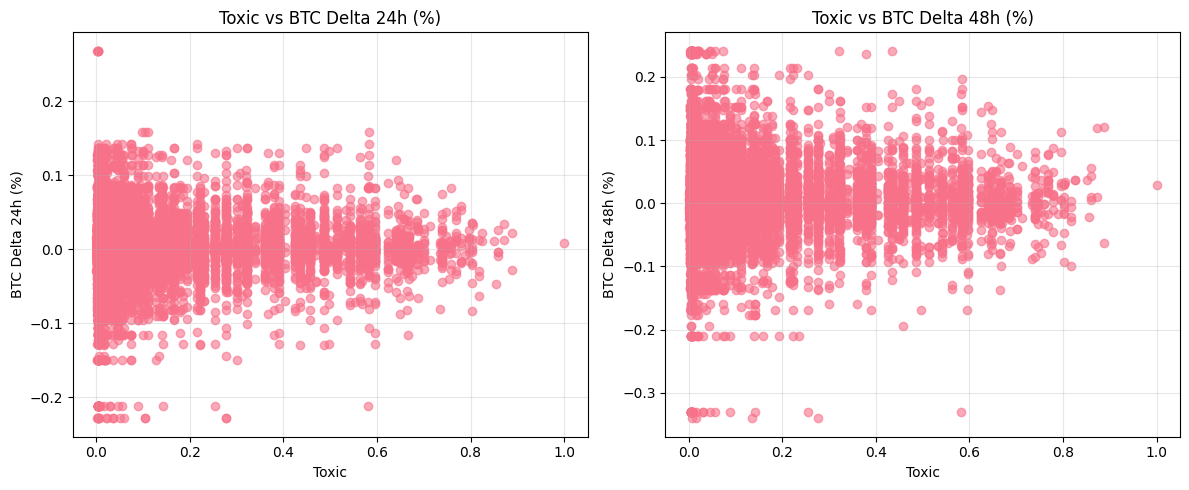

In [398]:
# Scatter plot: toxic vs BTC deltas
plot_google_vs_btc_deltas('toxic')


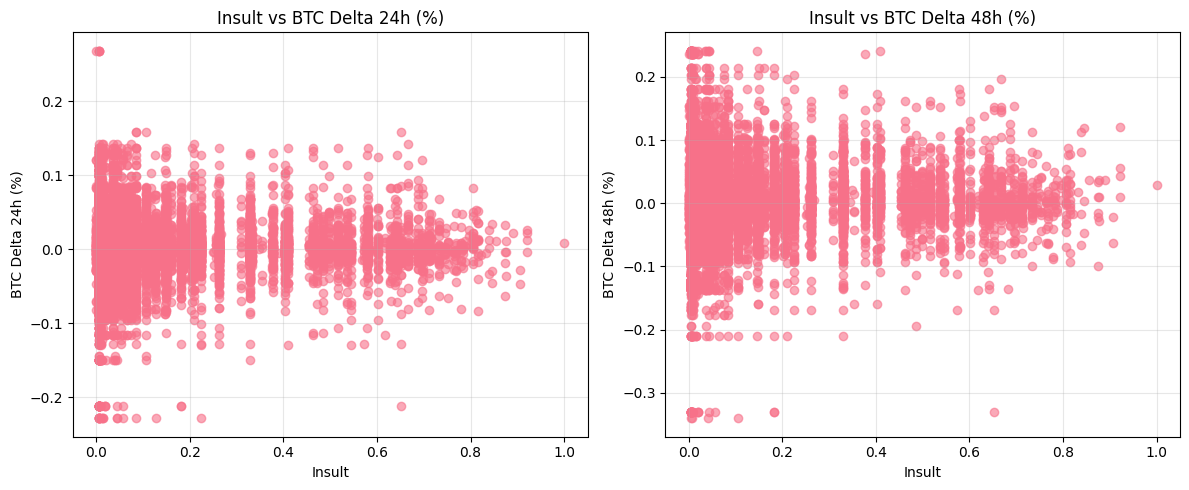

In [399]:
# Scatter plot: insult vs BTC deltas
plot_google_vs_btc_deltas('insult')


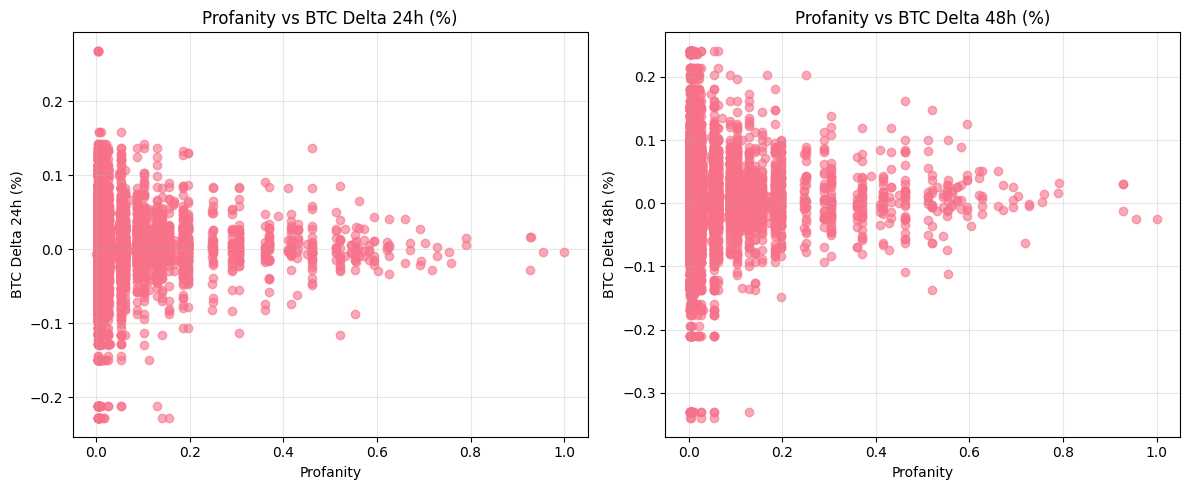

In [400]:
# Scatter plot: profanity vs BTC deltas
plot_google_vs_btc_deltas('profanity')


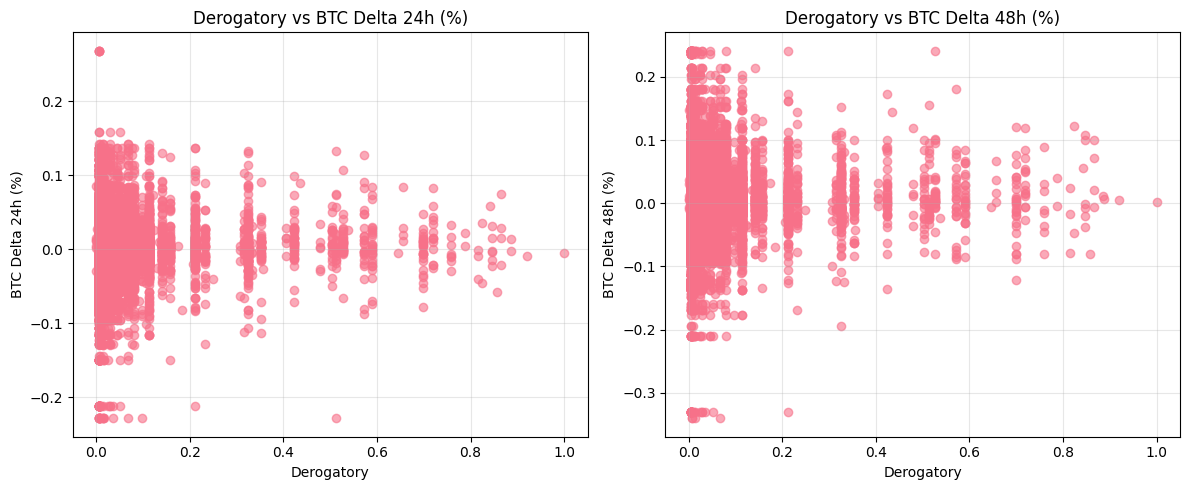

In [401]:
# Scatter plot: derogatory vs BTC deltas
plot_google_vs_btc_deltas('derogatory')


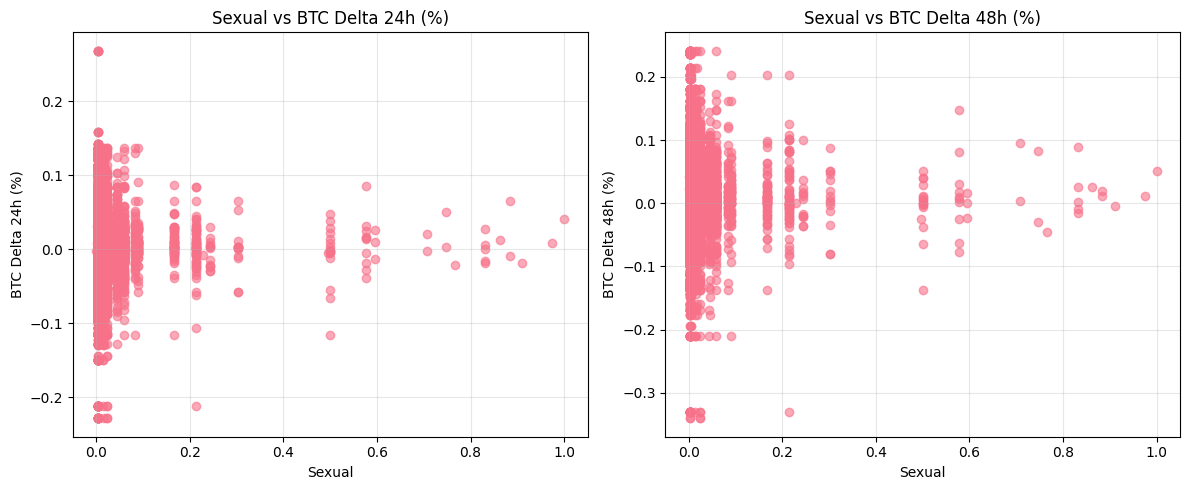

In [402]:
# Scatter plot: sexual vs BTC deltas
plot_google_vs_btc_deltas('sexual')


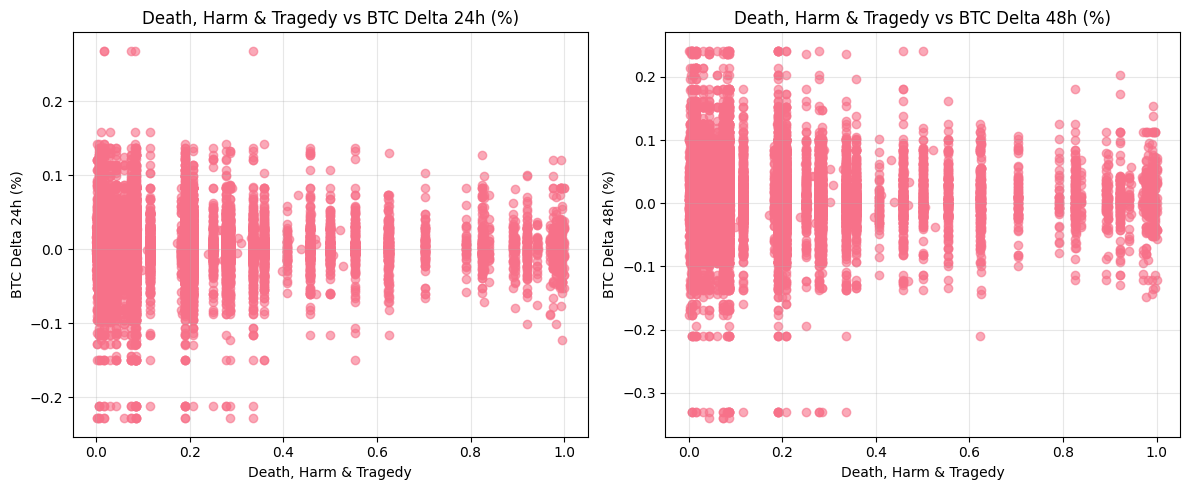

In [403]:
# Scatter plot: death,_harm_&_tragedy vs BTC deltas
plot_google_vs_btc_deltas('death,_harm_&_tragedy', 'Death, Harm & Tragedy')


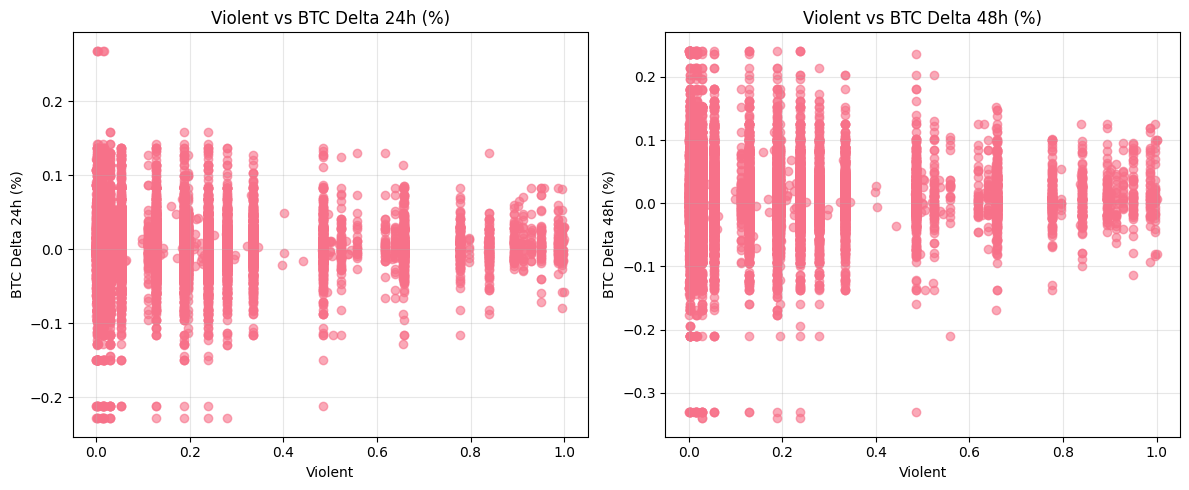

In [404]:
# Scatter plot: violent vs BTC deltas
plot_google_vs_btc_deltas('violent')


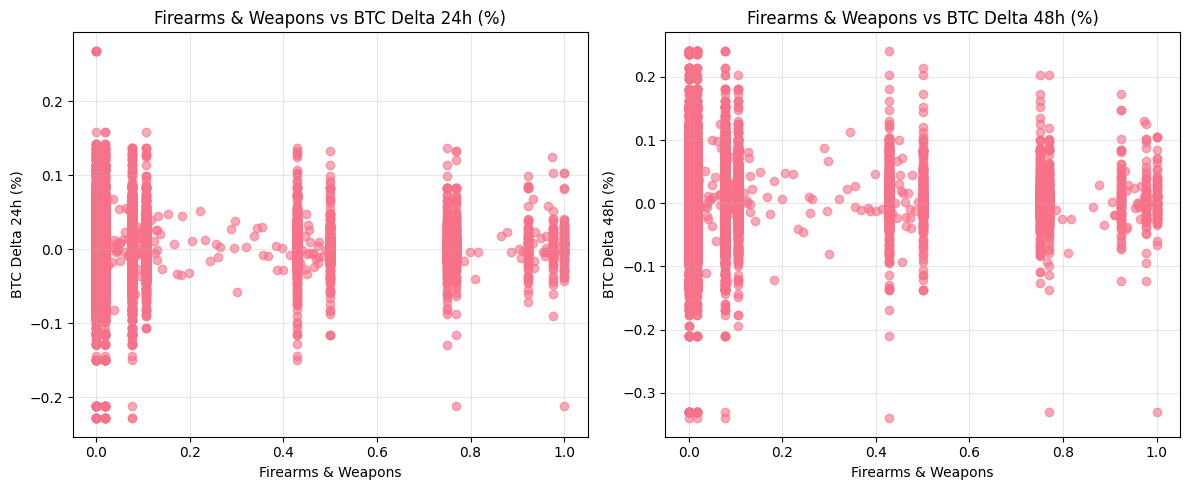

In [405]:
# Scatter plot: firearms_&_weapons vs BTC deltas
plot_google_vs_btc_deltas('firearms_&_weapons', 'Firearms & Weapons')


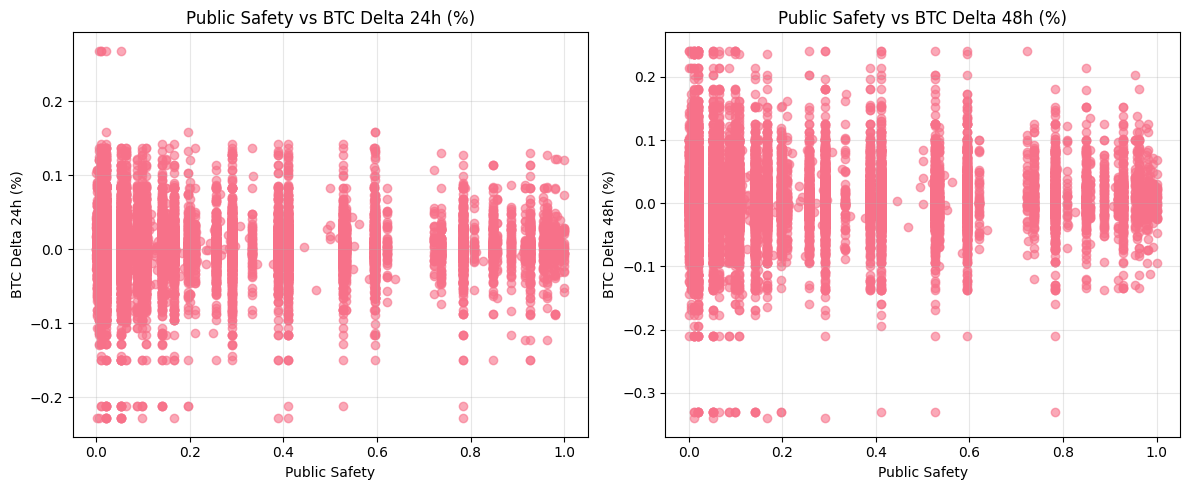

In [406]:
# Scatter plot: public_safety vs BTC deltas
plot_google_vs_btc_deltas('public_safety', 'Public Safety')


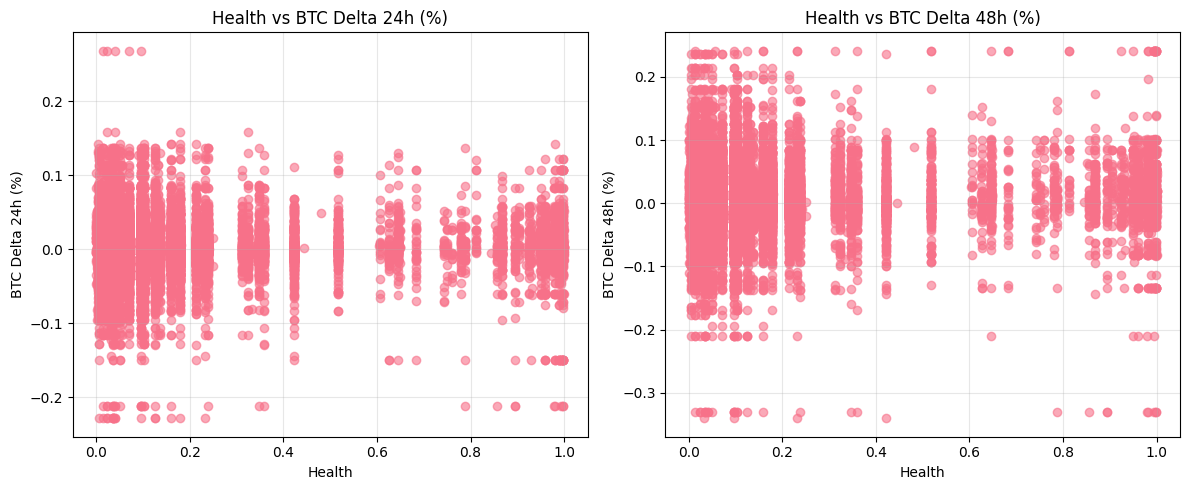

In [407]:
# Scatter plot: health vs BTC deltas
plot_google_vs_btc_deltas('health')


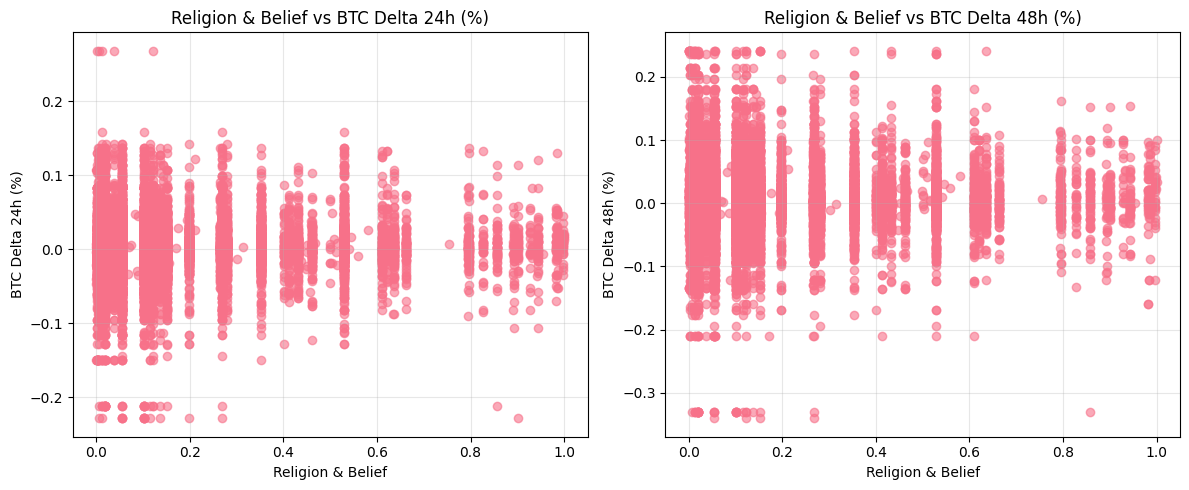

In [408]:
# Scatter plot: religion_&_belief vs BTC deltas
plot_google_vs_btc_deltas('religion_&_belief', 'Religion & Belief')


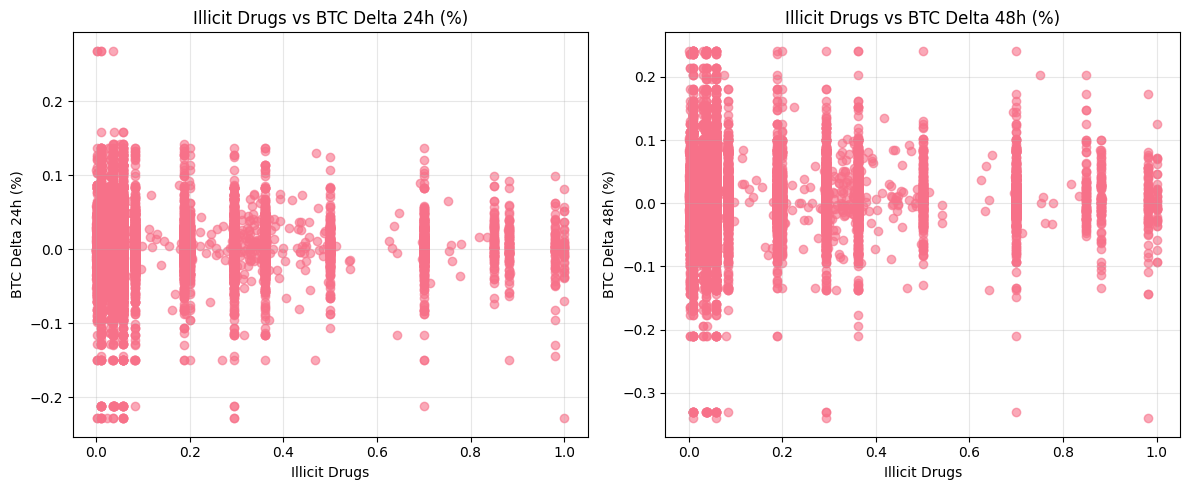

In [409]:
# Scatter plot: illicit_drugs vs BTC deltas
plot_google_vs_btc_deltas('illicit_drugs', 'Illicit Drugs')


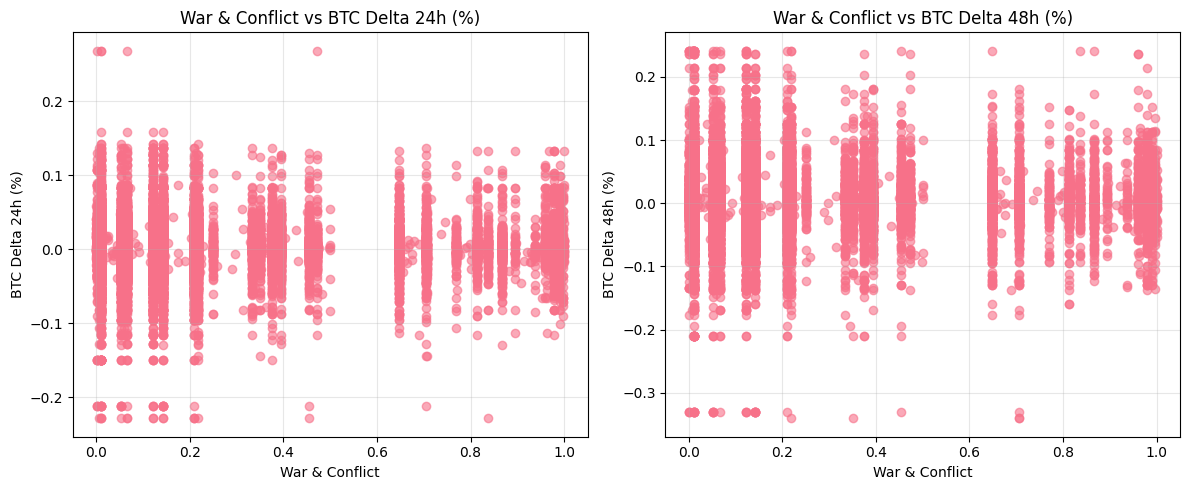

In [410]:
# Scatter plot: war_&_conflict vs BTC deltas
plot_google_vs_btc_deltas('war_&_conflict', 'War & Conflict')


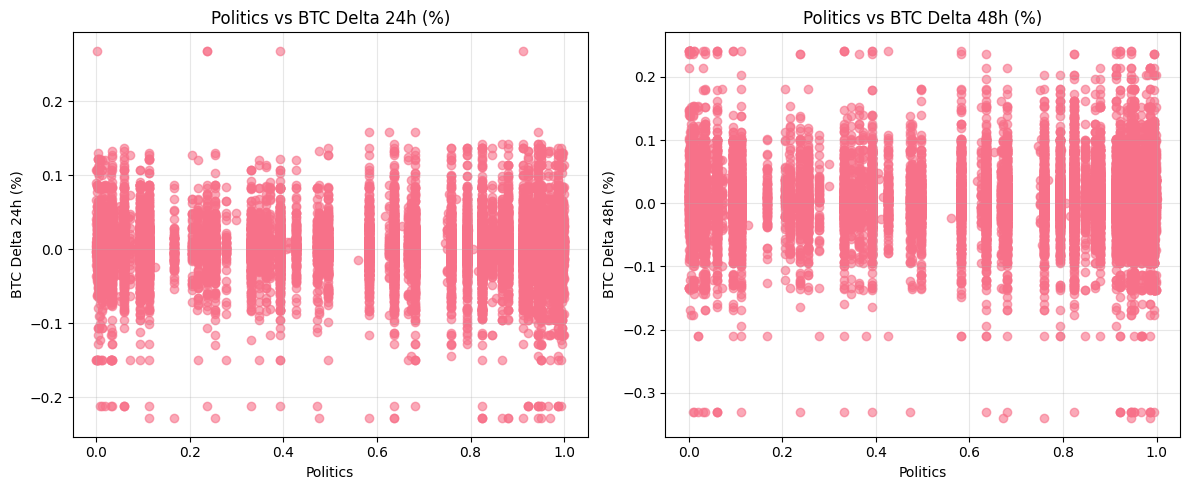

In [411]:
# Scatter plot: politics vs BTC deltas
plot_google_vs_btc_deltas('politics')


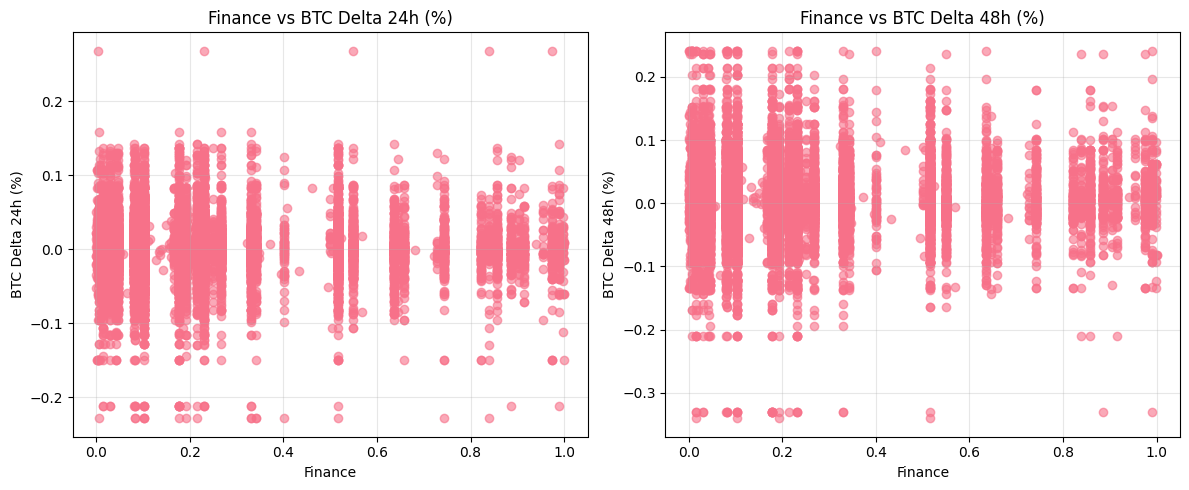

In [412]:
# Scatter plot: finance vs BTC deltas
plot_google_vs_btc_deltas('finance')


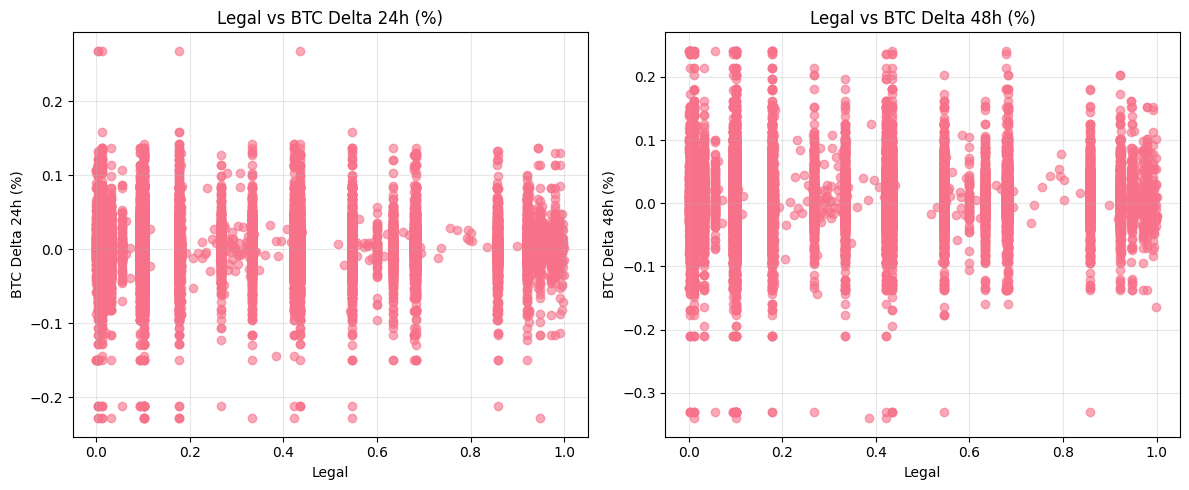

In [413]:
# Scatter plot: legal vs BTC deltas
plot_google_vs_btc_deltas('legal')


## Análisis de Puntos de Inflexión en el Precio del Bitcoin

En esta sección vamos a identificar tweets que marquen puntos de inflexión en el precio del Bitcoin. 
Para esto analizaremos:
1. La tendencia del Bitcoin en los 4 días previos al tweet
2. La tendencia del Bitcoin en las 24 horas posteriores al tweet  
3. Identificar cambios de tendencia (de bajista a alcista o viceversa)


In [414]:
# Cargar datos históricos de Bitcoin
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Cargar datos históricos de Bitcoin (15 minutos)
btc_data = pd.read_csv('../data/btc_15m_data_2018_to_2025.csv')

# Convertir columna de tiempo a datetime
btc_data['Open time'] = pd.to_datetime(btc_data['Open time'])
btc_data['date'] = btc_data['Open time'].dt.date

# Crear datos diarios agregando por día (usando el precio de cierre del último período del día)
btc_daily = btc_data.groupby('date').agg({
    'Open': 'first',
    'High': 'max', 
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

# Convertir date a datetime para facilitar cálculos
btc_daily['date'] = pd.to_datetime(btc_daily['date'])

print(f"Datos de Bitcoin cargados: {len(btc_daily)} días")
print(f"Rango de fechas: {btc_daily['date'].min()} a {btc_daily['date'].max()}")
btc_daily.head()


Datos de Bitcoin cargados: 2804 días
Rango de fechas: 2018-01-01 00:00:00 a 2025-09-04 00:00:00


,date,Open,High,Low,Close,Volume
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125


In [415]:
# Preparar datos de tweets
# Convertir fecha de tweets a datetime
df['date'] = pd.to_datetime(df['date'])
df['tweet_date'] = df['date'].dt.date

print(f"Tweets disponibles: {len(df)}")
print(f"Rango de fechas de tweets: {df['date'].min()} a {df['date'].max()}")

# Verificar que tenemos datos de Bitcoin para el rango de tweets
tweet_start = df['date'].min().date()
tweet_end = df['date'].max().date()
btc_start = btc_daily['date'].min().date()
btc_end = btc_daily['date'].max().date()

print(f"\nCobertura de datos:")
print(f"Tweets: {tweet_start} a {tweet_end}")
print(f"Bitcoin: {btc_start} a {btc_end}")

# Verificar superposición
overlap_start = max(tweet_start, btc_start)
overlap_end = min(tweet_end, btc_end)
print(f"Superposición: {overlap_start} a {overlap_end}")


Tweets disponibles: 22451
Rango de fechas de tweets: 2018-01-02 12:09:00 a 2021-01-08 15:44:00

Cobertura de datos:
Tweets: 2018-01-02 a 2021-01-08
Bitcoin: 2018-01-01 a 2025-09-04
Superposición: 2018-01-02 a 2021-01-08


In [416]:
def calculate_trend(prices, days=4):
    """
    Calcula la tendencia de una serie de precios usando regresión lineal simple
    
    Args:
        prices: Lista de precios
        days: Número de días para el cálculo
    
    Returns:
        slope: Pendiente de la regresión (positiva = alcista, negativa = bajista)
        trend: 'alcista', 'bajista' o 'neutral'
    """
    if len(prices) < 2:
        return 0, 'neutral'
    
    # Crear índices para regresión lineal
    x = np.arange(len(prices))
    
    # Calcular pendiente usando mínimos cuadrados
    n = len(prices)
    sum_x = np.sum(x)
    sum_y = np.sum(prices)
    sum_xy = np.sum(x * prices)
    sum_x2 = np.sum(x * x)
    
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x * sum_x)
    
    # Clasificar tendencia
    # Usar un umbral mínimo para evitar ruido
    threshold = np.std(prices) * 0.1  # 10% de la desviación estándar
    
    if slope > threshold:
        trend = 'alcista'
    elif slope < -threshold:
        trend = 'bajista'
    else:
        trend = 'neutral'
    
    return slope, trend

# Función para obtener precios de Bitcoin en un rango de fechas
def get_btc_prices_for_period(start_date, end_date):
    """
    Obtiene los precios de cierre de Bitcoin para un período específico
    """
    mask = (btc_daily['date'].dt.date >= start_date) & (btc_daily['date'].dt.date <= end_date)
    period_data = btc_daily[mask].copy()
    return period_data['Close'].values

# Test de la función
test_prices = [100, 102, 105, 103, 108]
slope, trend = calculate_trend(test_prices)
print(f"Test - Slope: {slope:.4f}, Trend: {trend}")


Test - Slope: 1.7000, Trend: alcista


In [417]:
# Calcular tendencias para cada tweet
def analyze_tweet_impact(tweet_row):
    """
    Analiza el impacto de un tweet en el precio del Bitcoin
    """
    tweet_date = tweet_row['tweet_date']
    
    # Calcular fechas de análisis
    start_before = tweet_date - timedelta(days=4)
    end_before = tweet_date - timedelta(days=1)
    start_after = tweet_date
    end_after = tweet_date + timedelta(days=1)
    
    # Obtener precios antes del tweet (4 días previos)
    prices_before = get_btc_prices_for_period(start_before, end_before)
    
    # Obtener precios después del tweet (24 horas)
    prices_after = get_btc_prices_for_period(start_after, end_after)
    
    # Calcular tendencias
    if len(prices_before) >= 2:
        slope_before, trend_before = calculate_trend(prices_before)
    else:
        slope_before, trend_before = 0, 'neutral'
    
    if len(prices_after) >= 2:
        slope_after, trend_after = calculate_trend(prices_after)
    else:
        slope_after, trend_after = 0, 'neutral'
    
    # Determinar si hay cambio de tendencia
    inflection = False
    if trend_before != 'neutral' and trend_after != 'neutral' and trend_before != trend_after:
        inflection = True
    
    return {
        'slope_before': slope_before,
        'trend_before': trend_before,
        'slope_after': slope_after, 
        'trend_after': trend_after,
        'inflection': inflection,
        'prices_before_count': len(prices_before),
        'prices_after_count': len(prices_after)
    }

# Aplicar análisis a una muestra de tweets primero (para probar)
print("Analizando muestra de tweets...")
sample_df = df.head(100).copy()

# Aplicar análisis
results = []
for idx, row in sample_df.iterrows():
    result = analyze_tweet_impact(row)
    result['tweet_idx'] = idx
    results.append(result)

# Convertir a DataFrame
results_df = pd.DataFrame(results)
print(f"Análisis completado para {len(results_df)} tweets")
print(f"Tweets con datos suficientes antes: {(results_df['prices_before_count'] >= 2).sum()}")
print(f"Tweets con datos suficientes después: {(results_df['prices_after_count'] >= 2).sum()}")
print(f"Puntos de inflexión encontrados: {results_df['inflection'].sum()}")

results_df.head()


Analizando muestra de tweets...
Análisis completado para 100 tweets
Tweets con datos suficientes antes: 100
Tweets con datos suficientes después: 100
Puntos de inflexión encontrados: 47


,slope_before,trend_before,slope_after,trend_after,inflection,prices_before_count,prices_after_count,tweet_idx
0,67.526,alcista,-9.20,bajista,True,4,2,0
1,184.041,alcista,2.68,alcista,False,4,2,1
2,90.139,alcista,-108.09,bajista,True,4,2,2
3,184.041,alcista,2.68,alcista,False,4,2,3
4,184.041,alcista,2.68,alcista,False,4,2,4


In [418]:
# Ahora aplicar el análisis a TODOS los tweets
print("Analizando TODOS los tweets para encontrar puntos de inflexión...")

# Filtrar tweets que tienen datos de Bitcoin disponibles
df['date'] = pd.to_datetime(df['date'])
df['tweet_date'] = df['date'].dt.date

# Filtrar tweets dentro del rango de datos de Bitcoin
btc_start = btc_daily['date'].min().date()
btc_end = btc_daily['date'].max().date()

# Necesitamos al menos 4 días antes y 1 día después
analysis_start = btc_start + timedelta(days=4)
analysis_end = btc_end - timedelta(days=1)

valid_tweets = df[(df['tweet_date'] >= analysis_start) & (df['tweet_date'] <= analysis_end)].copy()
print(f"Tweets válidos para análisis: {len(valid_tweets)} de {len(df)} totales")

# Aplicar análisis a todos los tweets válidos
all_results = []
for idx, row in valid_tweets.iterrows():
    result = analyze_tweet_impact(row)
    result['tweet_idx'] = idx
    result['tweet_date'] = row['tweet_date']
    result['tweet_text'] = row['text'][:100] + "..." if len(row['text']) > 100 else row['text']
    result['favorites'] = row['favorites']
    result['retweets'] = row['retweets']
    all_results.append(result)

# Convertir a DataFrame
all_results_df = pd.DataFrame(all_results)

print(f"\nResultados del análisis completo:")
print(f"Tweets analizados: {len(all_results_df)}")
print(f"Tweets con datos suficientes: {((all_results_df['prices_before_count'] >= 2) & (all_results_df['prices_after_count'] >= 2)).sum()}")
print(f"Puntos de inflexión encontrados: {all_results_df['inflection'].sum()}")

# Mostrar distribución de tendencias
print(f"\nDistribución de tendencias ANTES del tweet:")
print(all_results_df['trend_before'].value_counts())

print(f"\nDistribución de tendencias DESPUÉS del tweet:")
print(all_results_df['trend_after'].value_counts())

all_results_df.head()


Analizando TODOS los tweets para encontrar puntos de inflexión...
Tweets válidos para análisis: 22424 de 22451 totales

Resultados del análisis completo:
Tweets analizados: 22424
Tweets con datos suficientes: 22424
Puntos de inflexión encontrados: 10960

Distribución de tendencias ANTES del tweet:
trend_before
alcista    11563
bajista     9116
neutral     1745
Name: count, dtype: int64

Distribución de tendencias DESPUÉS del tweet:
trend_after
alcista    12237
bajista    10187
Name: count, dtype: int64


,slope_before,trend_before,slope_after,trend_after,inflection,prices_before_count,prices_after_count,tweet_idx,tweet_date,tweet_text,favorites,retweets
0,67.526,alcista,-9.20,bajista,True,4,2,0,2020-03-03,I was thrilled to be back in the Great city of...,73748,17404
1,184.041,alcista,2.68,alcista,False,4,2,1,2020-01-17,RT @CBS_Herridge: READ: Letter to surveillance...,0,7396
2,90.139,alcista,-108.09,bajista,True,4,2,2,2020-09-12,The Unsolicited Mail In Ballot Scam is a major...,80527,23502
3,184.041,alcista,2.68,alcista,False,4,2,3,2020-01-17,RT @MZHemingway: Very friendly telling of even...,0,9081
4,184.041,alcista,2.68,alcista,False,4,2,4,2020-01-17,RT @WhiteHouse: President @realDonaldTrump ann...,0,25048


In [419]:
# ANÁLISIS CORREGIDO: Solo período de tweets de Trump (2018-2021)
print("=== ANÁLISIS CORREGIDO PARA PERÍODO DE TWEETS DE TRUMP ===")

# Redefinir el período de análisis solo para cuando tenemos tweets
trump_tweet_start = df['date'].min().date()  # 2018-01-02
trump_tweet_end = df['date'].max().date()    # 2021-01-08

print(f"Período de tweets de Trump: {trump_tweet_start} a {trump_tweet_end}")

# Filtrar datos de Bitcoin solo para este período
btc_trump_period = btc_daily[
    (btc_daily['date'].dt.date >= trump_tweet_start) & 
    (btc_daily['date'].dt.date <= trump_tweet_end)
].copy()

print(f"Datos de Bitcoin en período Trump: {len(btc_trump_period)} días")
print(f"Rango de precios: ${btc_trump_period['Close'].min():,.2f} - ${btc_trump_period['Close'].max():,.2f}")

# Re-analizar solo los tweets en este período
trump_results = []
for idx, row in df.iterrows():
    tweet_date = row['date'].date()
    
    # Solo analizar si está en el período de datos de Bitcoin disponibles
    if (tweet_date >= btc_trump_period['date'].dt.date.min() and 
        tweet_date <= btc_trump_period['date'].dt.date.max()):
        
        # Calcular fechas de análisis
        start_before = tweet_date - timedelta(days=4)
        end_before = tweet_date - timedelta(days=1)
        start_after = tweet_date
        end_after = tweet_date + timedelta(days=1)
        
        # Obtener precios del período Trump
        prices_before = btc_trump_period[
            (btc_trump_period['date'].dt.date >= start_before) & 
            (btc_trump_period['date'].dt.date <= end_before)
        ]['Close'].values
        
        prices_after = btc_trump_period[
            (btc_trump_period['date'].dt.date >= start_after) & 
            (btc_trump_period['date'].dt.date <= end_after)
        ]['Close'].values
        
        # Calcular tendencias
        if len(prices_before) >= 2:
            slope_before, trend_before = calculate_trend(prices_before)
        else:
            slope_before, trend_before = 0, 'neutral'
        
        if len(prices_after) >= 2:
            slope_after, trend_after = calculate_trend(prices_after)
        else:
            slope_after, trend_after = 0, 'neutral'
        
        # Determinar si hay cambio de tendencia
        inflection = False
        if trend_before != 'neutral' and trend_after != 'neutral' and trend_before != trend_after:
            inflection = True
        
        trump_results.append({
            'tweet_idx': idx,
            'tweet_date': tweet_date,
            'tweet_text': row['text'][:100] + "..." if len(row['text']) > 100 else row['text'],
            'favorites': row['favorites'],
            'retweets': row['retweets'],
            'engagement': row['favorites'] + row['retweets'],
            'slope_before': slope_before,
            'trend_before': trend_before,
            'slope_after': slope_after,
            'trend_after': trend_after,
            'inflection': inflection,
            'prices_before_count': len(prices_before),
            'prices_after_count': len(prices_after)
        })

trump_results_df = pd.DataFrame(trump_results)

print(f"\n=== RESULTADOS PERÍODO TRUMP ===")
print(f"Tweets analizados: {len(trump_results_df)}")
print(f"Tweets con datos suficientes: {((trump_results_df['prices_before_count'] >= 2) & (trump_results_df['prices_after_count'] >= 2)).sum()}")
print(f"Puntos de inflexión encontrados: {trump_results_df['inflection'].sum()}")

trump_results_df.head()


=== ANÁLISIS CORREGIDO PARA PERÍODO DE TWEETS DE TRUMP ===
Período de tweets de Trump: 2018-01-02 a 2021-01-08
Datos de Bitcoin en período Trump: 1103 días
Rango de precios: $3,211.72 - $40,582.81

=== RESULTADOS PERÍODO TRUMP ===
Tweets analizados: 22451
Tweets con datos suficientes: 22432
Puntos de inflexión encontrados: 10958


,tweet_idx,tweet_date,tweet_text,favorites,retweets,engagement,slope_before,trend_before,slope_after,trend_after,inflection,prices_before_count,prices_after_count
0,0,2020-03-03,I was thrilled to be back in the Great city of...,73748,17404,91152,67.526,alcista,-9.20,bajista,True,4,2
1,1,2020-01-17,RT @CBS_Herridge: READ: Letter to surveillance...,0,7396,7396,184.041,alcista,2.68,alcista,False,4,2
2,2,2020-09-12,The Unsolicited Mail In Ballot Scam is a major...,80527,23502,104029,90.139,alcista,-108.09,bajista,True,4,2
3,3,2020-01-17,RT @MZHemingway: Very friendly telling of even...,0,9081,9081,184.041,alcista,2.68,alcista,False,4,2
4,4,2020-01-17,RT @WhiteHouse: President @realDonaldTrump ann...,0,25048,25048,184.041,alcista,2.68,alcista,False,4,2


In [420]:
# Análisis de puntos de inflexión en el período Trump
trump_inflection_tweets = trump_results_df[trump_results_df['inflection'] == True].copy()

if len(trump_inflection_tweets) > 0:
    print(f"¡Encontrados {len(trump_inflection_tweets)} tweets que marcan puntos de inflexión en el período Trump!")
    
    # Ordenar por engagement
    trump_inflection_tweets = trump_inflection_tweets.sort_values('engagement', ascending=False)
    
    print(f"\nTop 10 tweets con mayor impacto (puntos de inflexión) - Período Trump:")
    for i, (_, tweet) in enumerate(trump_inflection_tweets.head(10).iterrows()):
        print(f"\n{i+1}. Fecha: {tweet['tweet_date']}")
        print(f"   Tendencia: {tweet['trend_before']} → {tweet['trend_after']}")
        print(f"   Engagement: {tweet['engagement']:,} (♥{tweet['favorites']:,} + ↻{tweet['retweets']:,})")
        print(f"   Texto: {tweet['tweet_text']}")
        
    # Mostrar estadísticas de cambios de tendencia
    print(f"\nTipos de cambios de tendencia en período Trump:")
    trend_changes = trump_inflection_tweets.groupby(['trend_before', 'trend_after']).size()
    for (before, after), count in trend_changes.items():
        print(f"  {before} → {after}: {count} tweets")
        
else:
    print("No se encontraron puntos de inflexión claros en el período Trump.")
    
# Mostrar distribución de tendencias en período Trump
print(f"\nDistribución de tendencias ANTES del tweet (período Trump):")
print(trump_results_df['trend_before'].value_counts())

print(f"\nDistribución de tendencias DESPUÉS del tweet (período Trump):")
print(trump_results_df['trend_after'].value_counts())


¡Encontrados 10958 tweets que marcan puntos de inflexión en el período Trump!

Top 10 tweets con mayor impacto (puntos de inflexión) - Período Trump:

1. Fecha: 2020-10-03
   Tendencia: bajista → alcista
   Engagement: 1,359,475 (♥1,219,870 + ↻139,605)
   Texto: Going welI, I think! Thank you to all. LOVE!!!

2. Fecha: 2020-11-05
   Tendencia: alcista → bajista
   Engagement: 869,267 (♥748,645 + ↻120,622)
   Texto: STOP THE COUNT!

3. Fecha: 2020-01-08
   Tendencia: alcista → bajista
   Engagement: 855,846 (♥713,124 + ↻142,722)
   Texto: All is well! Missiles launched from Iran at two military bases located in Iraq. Assessment of casual...

4. Fecha: 2020-11-16
   Tendencia: bajista → alcista
   Engagement: 829,983 (♥718,605 + ↻111,378)
   Texto: I WON THE ELECTION!

5. Fecha: 2020-11-08
   Tendencia: alcista → bajista
   Engagement: 810,791 (♥689,597 + ↻121,194)
   Texto: Since when does the Lamestream Media call who our next president will be? We have all learned a lot ...

6. Fecha:

Creando gráfico para período de Trump...


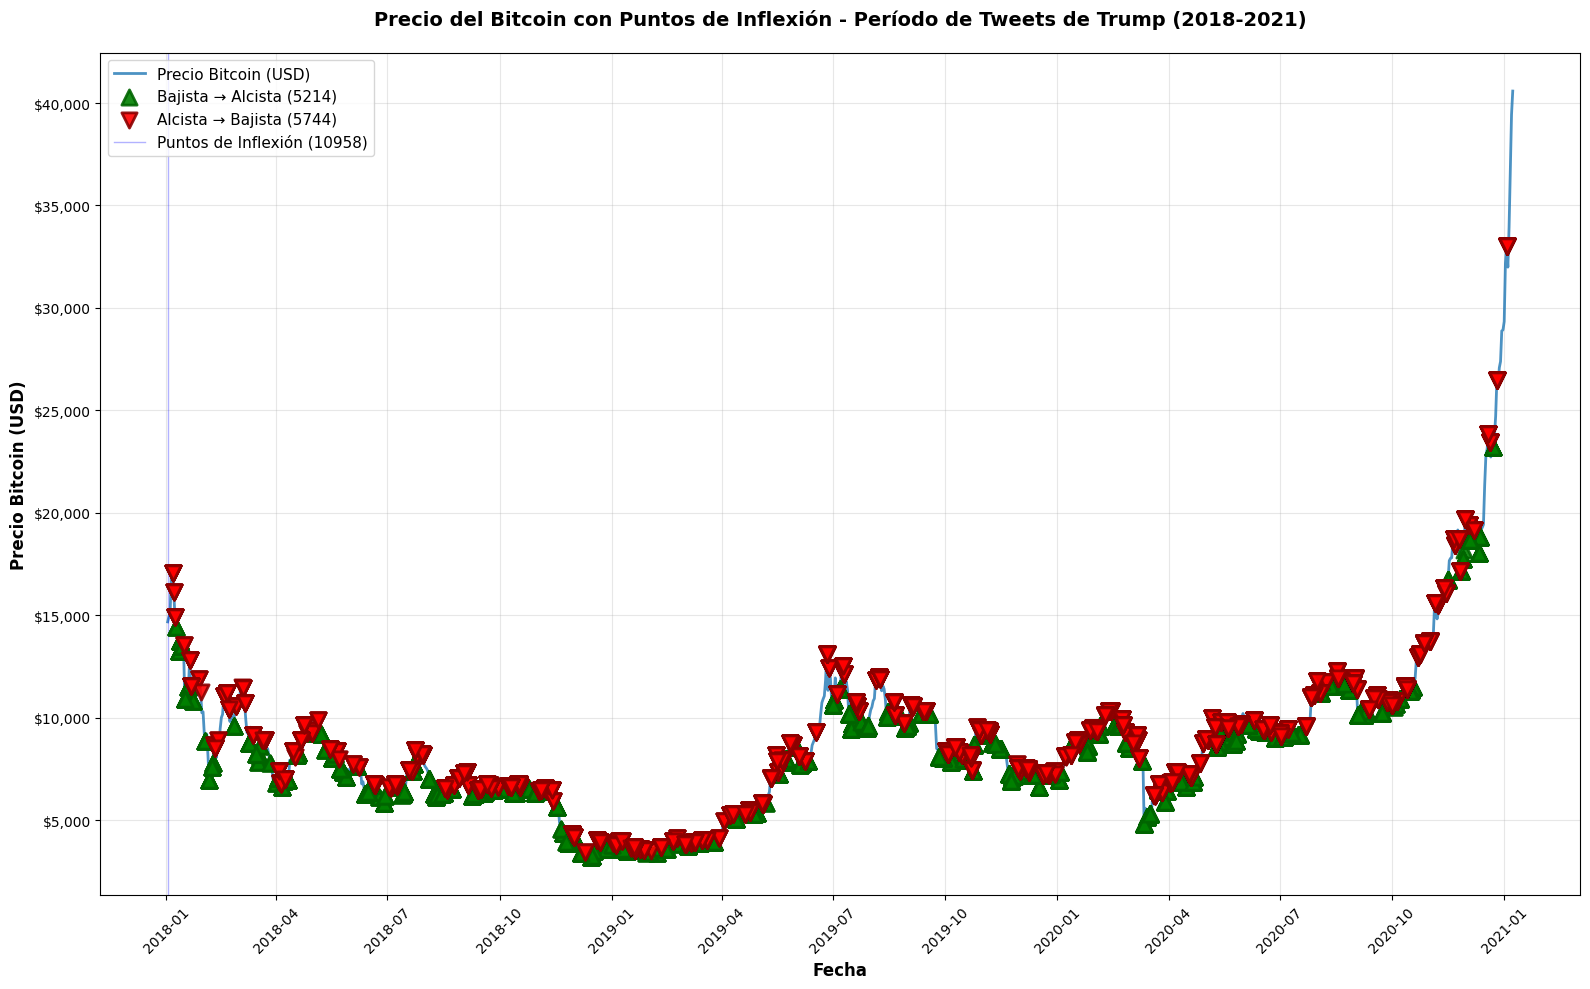


=== ESTADÍSTICAS DEL GRÁFICO CORREGIDO ===
Período analizado: 2018-01-02 a 2021-01-08
Puntos de inflexión totales: 10958
Cambios bajista → alcista: 5214
Cambios alcista → bajista: 5744
Engagement promedio de tweets inflexión: 68,980

Evolución del Bitcoin en período Trump:
Precio inicial (2018-01-02): $14,675.11
Precio final (2021-01-08): $40,582.81
Cambio total: +176.5%


In [421]:
# GRÁFICO CORREGIDO: Solo período de tweets de Trump (2018-2021)
def create_trump_period_chart():
    """
    Crea un gráfico del precio del Bitcoin marcando los puntos de inflexión
    SOLO para el período donde tenemos tweets de Trump (2018-2021)
    """
    # Crear figura más grande para mejor visualización
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Gráfico principal del precio de Bitcoin (solo período Trump)
    ax.plot(btc_trump_period['date'], btc_trump_period['Close'], 
            color='#1f77b4', linewidth=2, alpha=0.8, label='Precio Bitcoin (USD)')
    
    # Marcar puntos de inflexión si los hay
    if len(trump_inflection_tweets) > 0:
        # Separar por tipo de cambio de tendencia
        bajista_a_alcista = trump_inflection_tweets[
            (trump_inflection_tweets['trend_before'] == 'bajista') & 
            (trump_inflection_tweets['trend_after'] == 'alcista')
        ]
        
        alcista_a_bajista = trump_inflection_tweets[
            (trump_inflection_tweets['trend_before'] == 'alcista') & 
            (trump_inflection_tweets['trend_after'] == 'bajista')
        ]
        
        # Marcar puntos bajista → alcista (verde)
        if len(bajista_a_alcista) > 0:
            ba_dates = pd.to_datetime(bajista_a_alcista['tweet_date'])
            ba_prices = []
            for date in ba_dates:
                price_data = btc_trump_period[btc_trump_period['date'].dt.date == date.date()]
                if len(price_data) > 0:
                    ba_prices.append(price_data['Close'].iloc[0])
            
            if ba_prices:  # Solo si tenemos precios
                ax.scatter(ba_dates, ba_prices, 
                          color='green', s=120, alpha=0.9, 
                          marker='^', label=f'Bajista → Alcista ({len(bajista_a_alcista)})', 
                          zorder=5, edgecolors='darkgreen', linewidth=2)
        
        # Marcar puntos alcista → bajista (rojo)
        if len(alcista_a_bajista) > 0:
            ab_dates = pd.to_datetime(alcista_a_bajista['tweet_date'])
            ab_prices = []
            for date in ab_dates:
                price_data = btc_trump_period[btc_trump_period['date'].dt.date == date.date()]
                if len(price_data) > 0:
                    ab_prices.append(price_data['Close'].iloc[0])
            
            if ab_prices:  # Solo si tenemos precios
                ax.scatter(ab_dates, ab_prices, 
                          color='red', s=120, alpha=0.9, 
                          marker='v', label=f'Alcista → Bajista ({len(alcista_a_bajista)})', 
                          zorder=5, edgecolors='darkred', linewidth=2)
    
    # Configurar ejes y formato
    ax.set_xlabel('Fecha', fontsize=12, fontweight='bold')
    ax.set_ylabel('Precio Bitcoin (USD)', fontsize=12, fontweight='bold')
    ax.set_title('Precio del Bitcoin con Puntos de Inflexión - Período de Tweets de Trump (2018-2021)', 
                fontsize=14, fontweight='bold', pad=20)
    
    # Formato de fechas en el eje X (más apropiado para 3 años)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Cada 3 meses
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    
    # Agregar línea azul a la leyenda
    if len(trump_inflection_tweets) > 0:
        ax.axvline(x=btc_trump_period['date'].iloc[0], color='blue', alpha=0.3, 
                  linewidth=1, linestyle='-', label=f'Puntos de Inflexión ({len(trump_inflection_tweets)})')
    
    # Grid y leyenda
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left', fontsize=11)
    
    # Formato del precio en el eje Y
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    
    # Ajustar layout
    plt.tight_layout()
    
    return fig, ax

# Crear el gráfico corregido
print("Creando gráfico para período de Trump...")
fig, ax = create_trump_period_chart()
plt.show()

# Mostrar estadísticas del gráfico corregido
print(f"\n=== ESTADÍSTICAS DEL GRÁFICO CORREGIDO ===")
print(f"Período analizado: {trump_tweet_start} a {trump_tweet_end}")
print(f"Puntos de inflexión totales: {len(trump_inflection_tweets) if len(trump_inflection_tweets) > 0 else 0}")

if len(trump_inflection_tweets) > 0:
    bajista_alcista = len(trump_inflection_tweets[
        (trump_inflection_tweets['trend_before'] == 'bajista') & 
        (trump_inflection_tweets['trend_after'] == 'alcista')
    ])
    alcista_bajista = len(trump_inflection_tweets[
        (trump_inflection_tweets['trend_before'] == 'alcista') & 
        (trump_inflection_tweets['trend_after'] == 'bajista')
    ])
    
    print(f"Cambios bajista → alcista: {bajista_alcista}")
    print(f"Cambios alcista → bajista: {alcista_bajista}")
    print(f"Engagement promedio de tweets inflexión: {trump_inflection_tweets['engagement'].mean():,.0f}")
    
    # Precio de Bitcoin al inicio y final del período Trump
    btc_start_price = btc_trump_period['Close'].iloc[0]
    btc_end_price = btc_trump_period['Close'].iloc[-1]
    price_change = ((btc_end_price - btc_start_price) / btc_start_price) * 100
    
    print(f"\nEvolución del Bitcoin en período Trump:")
    print(f"Precio inicial ({trump_tweet_start}): ${btc_start_price:,.2f}")
    print(f"Precio final ({trump_tweet_end}): ${btc_end_price:,.2f}")
    print(f"Cambio total: {price_change:+.1f}%")
